# COMP 6934 Winter 2025 In class Work 17

Tamara Munzner How methods and Idioms..


### Problem Set 17

Study the following visualization offered in the sns gallery:

https://seaborn.pydata.org/examples/hexbin_marginals.html

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/NL_weather.csv")
df.head()

C:\Users\Mas85\AppData\Local\Temp\ipykernel_536\149723967.py:1: DtypeWarning: Columns (3,20,22,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/NL_weather.csv")


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-22,2022,7,22,NaN,NaN,...,NaN,NaN,NaN,M,NaN,NaN,NaN,M,NaN,M
1,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-23,2022,7,23,NaN,19.9,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,41.0,NaN
2,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-24,2022,7,24,NaN,17.8,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,47.0,NaN
3,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-25,2022,7,25,NaN,18.7,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,53.0,NaN
4,-53.99,47.29,ARGENTIA (AUT),8400104,2022-07-26,2022,7,26,NaN,18.4,...,NaN,NaN,NaN,M,NaN,NaN,17.0,NaN,58.0,NaN


#### Problem 17.1

Create a synopsis of the seaborn visualization identified above in the manner of Munzner's one-slide desctipion of an Idiom.

Your synopsis should include

* A name for the idiom
* A breif description of the visualization, using *how* methods and techniques as part of the description where appropriate.
* The *what* classification of data and datasets that is is used for
* The specific use of marks and channels to represent different data characteristics and values
* This idiom's relationship to other idioms
* Any special observations about its application, usefuleness, strengths and weaknesses
* Visualization tasks (goals, objectives) for which it is best suited. (Use *why* action/target nomenclature where appropriate)
* Scalability

### Idiom Name: Hexbin with Marginals

#### Brief Description:

Hexbin with Marginals — combined hexagonal bin plot with histograms or kernel density plot on the axes. It is used to show the joint distribution between two continuous variables by aggregating points in hexagonal cells and coloring by the number of points in each. The marginal plots show the univariate distribution of each variable on the x and y axes, either as histograms or KDE. Training it branch-wise on both factors simultaneously, provides an overall perspective of joint distribution as well as higher-dimensional distributional properties inability of univariate distributions.

#### What Classification of Data and Datasets:
Data Type: Quantitative (continuous) for both variables.

Dataset Type: The dataset must contain at least two numerical variables for comparison.

Use Case: Ideal for datasets where scatterplots become cluttered due to overplotting (e.g., large datasets with many overlapping points).

#### Marks and Channels:

**Marks:** Hexagons represent the binned data points in the joint plot. Each hexagon is filled with a color corresponding to the density or count of data points falling within it.

**Channels:**

* Color: Represents the density of data points within each hexagon.
* Position: The x and y positions of the hexagons correspond to the values of the two variables being plotted.
* Shape: The shape is fixed as a hexagon, but the density of the points within each bin is represented by color intensity.

#### Relationship to Other Idioms:

**Scatterplot:** Like a scatterplot, this idiom shows the relationship between two continuous variables. However, it differs by summarizing the data in hexagonal bins, which can be more effective for larger datasets where individual points would overlap.

**Heatmap:** The hexbin plot is similar to a heatmap in that it uses color intensity to represent the density of points, but instead of a grid of cells, it uses hexagonal shapes to group data.

**Marginal Histograms/KDE:** The marginal plots are a form of univariate visualization, similar to histograms or KDE plots, but they are placed at the edges of the joint plot to show the distribution of each variable.

#### Special Observations:

**Strengths:**

* Effectively handles large datasets by reducing overplotting.

* Provides both bivariate and univariate views in a single plot.

* Hexagonal bins are more visually appealing and can better represent density patterns than square bins.

**Weaknesses:**

* Less intuitive for small datasets (scatterplots may be more appropriate).

* Requires careful tuning of bin size and color scales to avoid misinterpretation.

* May obscure fine-grained patterns due to aggregation.

#### Visualization Tasks (Why):
* Action: Analyze, Summarize.

* Target: Distribution, Correlation.

**Tasks:**

* Identify patterns or trends in the relationship between two variables.

* Summarize the density of data points in a bivariate distribution.

* Compare the marginal distributions of the two variables.

#### Scalability:
* Data Size: Scales well to large datasets (thousands to millions of observations).

* Dimensionality: Limited to two continuous variables.

* Complexity: Moderate (requires understanding of binning and color encoding).

This idiom is particularly useful for exploratory data analysis (EDA) when working with large datasets, as it provides a clear and compact representation of bivariate relationships and their marginal distributions.

#### Problem 17.2

Apply the sns visualization to our weather data to illustrate the application of the idiom.  You can choose the specific attributes and subset of records for the application, I would suggest dates and rainfall as a possibility. 


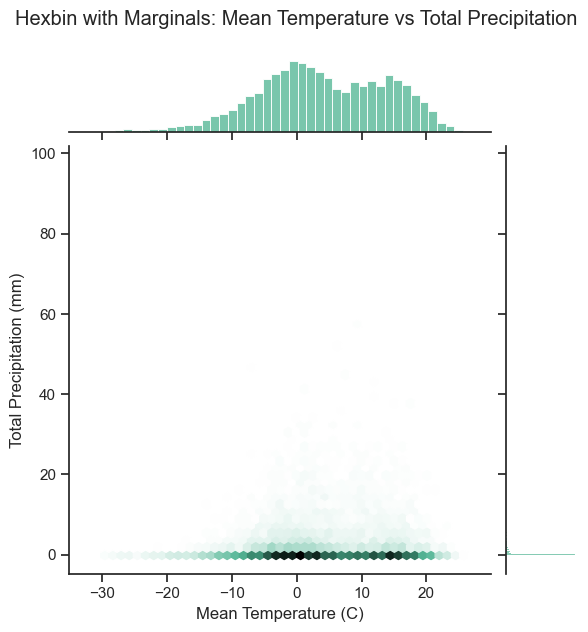

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Filter the data for the year 2020
df_filtered = df[df['Date/Time'].dt.year == 2020][['Mean Temp (C)', 'Total Precip (mm)']].dropna()

# Set the figure size
#plt.figure(figsize=(10, 6));

# Create the Hexbin with Marginals plot
sns.jointplot(x='Mean Temp (C)', y='Total Precip (mm)', data=df_filtered,  kind="hex", color="#4CB391")

# Add labels and title
plt.suptitle('Hexbin with Marginals: Mean Temperature vs Total Precipitation',y=1.05)
plt.xlabel('Mean Temperature (C)')
plt.ylabel('Total Precipitation (mm)')

# Show the plot
plt.show()


# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |
| T. Munzner book https://www.cs.ubc.ca/~tmm/vadbook/| methodology | *fill in specifics* |